In [ ]:
import numpy as np
import pandas as pd

df=pd.read_csv("Salaries.csv")
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


# Part 1


In [ ]:
#Number of rows and cols:
n_rows=len(df)
n_col=len(df.columns)

print("Number of rows= ",n_rows)
print("Number of columns= ",n_col)

#Determining datatypes
data_types = df.dtypes
print(data_types)  # in pandas object means string (usually)

#Checking missing val in each col:
missing_val = df.isnull().sum()
print(missing_val)


Number of rows=  148654
Number of columns=  13
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


# Part 2

In [ ]:
#To Calculate basic statistics, we need to determine numeric cols to apply these measures on
numeric_col=df[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']]
statistics=numeric_col.describe()

#for mode,median and range:
mode_val=numeric_col.mode()
median_val=numeric_col.median()
ranges= numeric_col.max() - numeric_col.min()

print(statistics)
print("median_val: \n",median_val)
print("mode_val: \n",mode_val)
print("range of salaries: \n",ranges)

             BasePay    OvertimePay       OtherPay       Benefits  \
count  148045.000000  148650.000000  148650.000000  112491.000000   
mean    66325.448841    5066.059886    3648.767297   25007.893151   
std     42764.635495   11454.380559    8056.601866   15402.215858   
min      -166.010000      -0.010000   -7058.590000     -33.890000   
25%     33588.200000       0.000000       0.000000   11535.395000   
50%     65007.450000       0.000000     811.270000   28628.620000   
75%     94691.050000    4658.175000    4236.065000   35566.855000   
max    319275.010000  245131.880000  400184.250000   96570.660000   

            TotalPay  TotalPayBenefits  
count  148654.000000     148654.000000  
mean    74768.321972      93692.554811  
std     50517.005274      62793.533483  
min      -618.130000       -618.130000  
25%     36168.995000      44065.650000  
50%     71426.610000      92404.090000  
75%    105839.135000     132876.450000  
max    567595.430000     567595.430000  
median_va

# Part 3 :
  Data Cleaning: Handle missing data by suitable method with explain why you use it.

In [ ]:
new_df=df.drop(columns=["Status","Notes"])


In [ ]:
#There are many ways to handle missing values, such as dropping them, using statistical measures to fill them,etc.
#After checking for missing values, I noticed that the "Notes" and "Status" columns contain only missing values. Therefore, I will be dropping both columns in the new dataframe. The updated code is:
new_df=df.drop(columns=["Status","Notes"])


#"Benefits" column has 36163 missing values. Though the number is small compared to the total records, I prefer to use mean imputation instead of dropping the records.
benefits_mean = new_df['Benefits'].mean()
new_df['Benefits'] = new_df['Benefits'].fillna(benefits_mean)

#"BasePay" column has 609 missing values, while "OvertimePay" and "OtherPay" columns have only 4. Because the number of missing values is small compared to the number of records, I will drop these rows.
new_df=new_df.dropna()
#dropna() drops rows with null values, so keep it for last.

new_df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,25007.893151,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,25007.893151,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,25007.893151,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,25007.893151,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,25007.893151,326373.19,326373.19,2011,San Francisco


In [ ]:
#Cheking missing values again
missing = new_df.isnull().sum()
print(missing)

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64


# Part 4


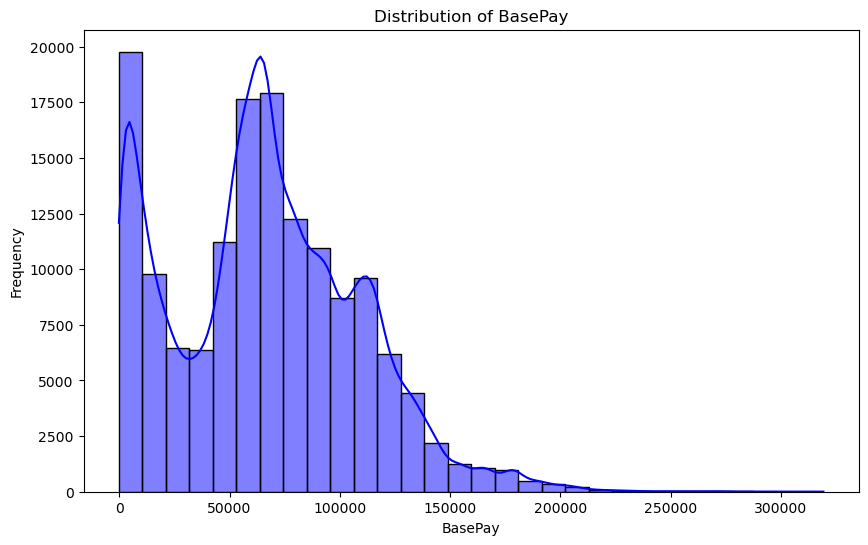

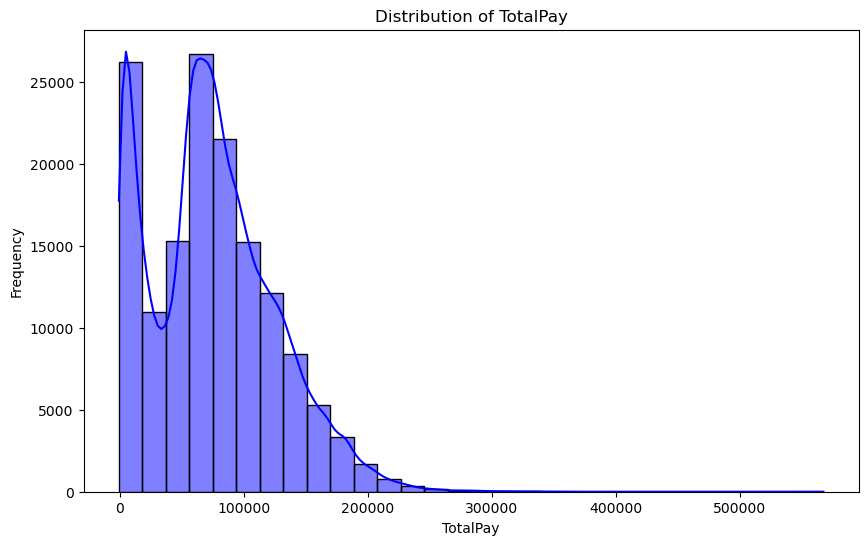

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#I didn't understand for what col exactly you want the visiualization , so I did it for TotalPay and BasePay
plt.figure(figsize=(10, 6))
sns.histplot(new_df['BasePay'], bins=30, kde=True, color='blue')
plt.title('Distribution of BasePay')
plt.xlabel('BasePay')
plt.ylabel('Frequency')
plt.show()





plt.figure(figsize=(10, 6))
sns.histplot(new_df['TotalPay'], bins=30, kde=True, color='blue')
plt.title('Distribution of TotalPay')
plt.xlabel('TotalPay')
plt.ylabel('Frequency')
plt.show()

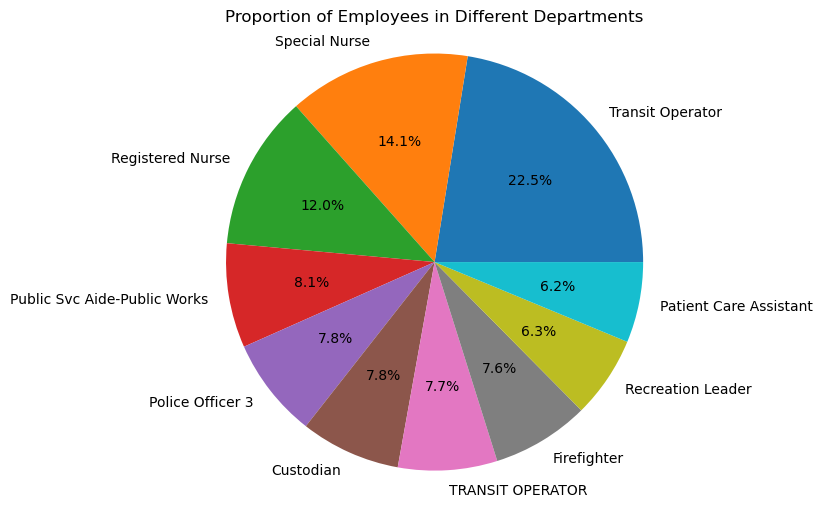

In [ ]:
# Visualization of proportion of employees in different departments using a pie chart

department_counts = new_df['JobTitle'].value_counts()
top_departments = department_counts.head(10)  # top 10 departments for visualization
plt.figure(figsize=(10, 6))
plt.pie(top_departments, labels=top_departments.index, autopct='%1.1f%%')
plt.title('Proportion of Employees in Different Departments')
plt.axis('equal')
plt.show()

# Part 5
Grouped Analysis: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.


NOTE:
-Since the question does not specify the column for grouping, I believe using "JobTitle" or "Year" would be a good choice.
Therefore, I will perform grouping two times.
-I used "BasePay" as "salaries" because I cn't determine which col I should use  

In [ ]:
#Using "JobTitle"
grouped_data = new_df.groupby('JobTitle')
#IF U WANNA SHOW THE GROUPS
#groups = grouped_data.groups
#print(groups)

summary_stat = grouped_data['BasePay'].describe()
print(summary_stat)
#OR JUST >>grouped_data['BasePay'].describe()



,count,mean,std,min,25%,50%,75%,max
JobTitle,,,,,,,,
ACCOUNT CLERK,83.0,43300.806506,12890.631740,614.00,42962.4700,49777.780,49777.8100,60838.20
ACCOUNTANT,5.0,46643.172000,27703.019579,0.00,42522.3000,60076.240,65225.3100,65392.01
ACCOUNTANT INTERN,48.0,28732.663958,20635.668379,2981.53,9940.0000,16806.755,53789.8000,58501.72
"ACPO,JuvP, Juv Prob (SFERS)",1.0,62290.780000,NaN,62290.78,62290.7800,62290.780,62290.7800,62290.78
ACUPUNCTURIST,1.0,66374.400000,NaN,66374.40,66374.4000,66374.400,66374.4000,66374.40
...,...,...,...,...,...,...,...,...
X-RAY LABORATORY AIDE,26.0,47664.773077,17300.039056,4690.68,49930.6175,54066.080,60053.5900,60086.62
X-Ray Laboratory Aide,100.0,46086.387100,20467.891506,1007.00,25886.6625,55251.635,64197.3650,66123.01
"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",1.0,52609.910000,NaN,52609.91,52609.9100,52609.910,52609.9100,52609.91


In [ ]:
#Using "Year"
grouped_data = new_df.groupby('Year')
summary_stat = grouped_data['BasePay'].describe()
print(summary_stat)



        count          mean           std     min        25%       50%  \
Year                                                                     
2011  36159.0  63595.956517  40556.774993    0.00  33468.125  62871.72   
2012  36766.0  65436.406857  41782.209797 -166.01  34036.580  64017.37   
2013  37001.0  69630.030216  44237.113207   15.83  37021.500  67669.00   
2014  38119.0  66564.421924  44053.783972    0.00  30138.055  65055.00   

             75%        max  
Year                         
2011  90649.7650  294580.02  
2012  92427.9275  302578.00  
2013  98272.5500  319275.01  
2014  94735.0500  318835.49  


,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2011,36159.0,63595.956517,40556.774993,0.00,33468.125,62871.72,90649.7650,294580.02
2012,36766.0,65436.406857,41782.209797,-166.01,34036.580,64017.37,92427.9275,302578.00
2013,37001.0,69630.030216,44237.113207,15.83,37021.500,67669.00,98272.5500,319275.01
2014,38119.0,66564.421924,44053.783972,0.00,30138.055,65055.00,94735.0500,318835.49


#

# Part 6
Simple Correlation Analysis: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

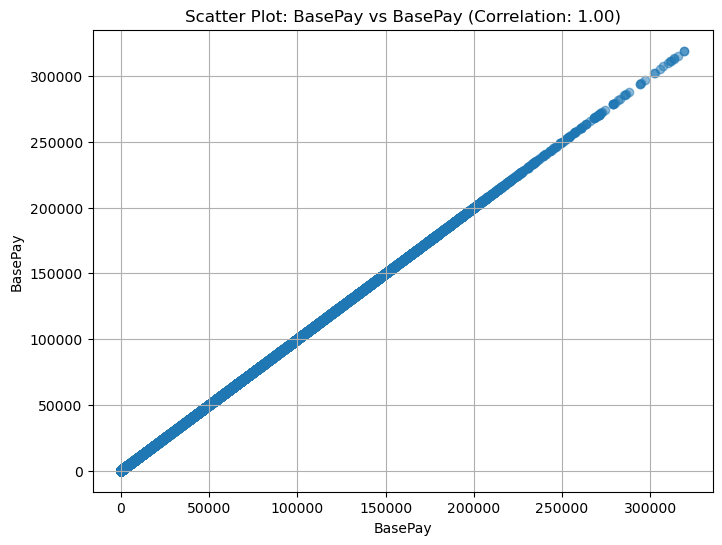

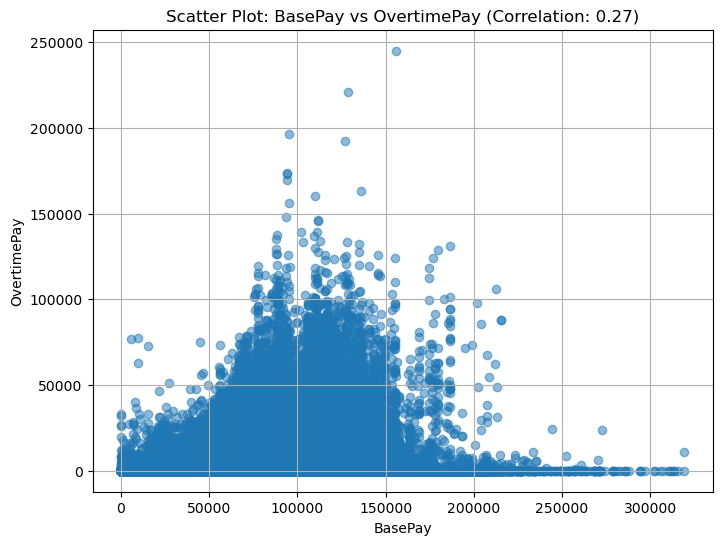

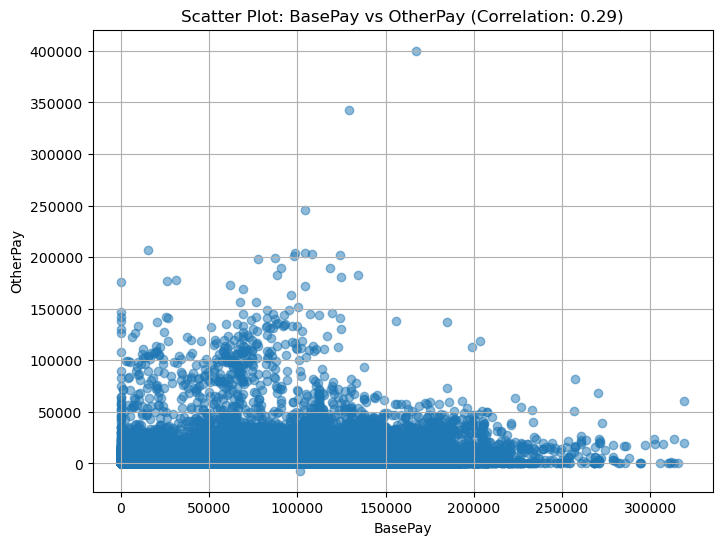

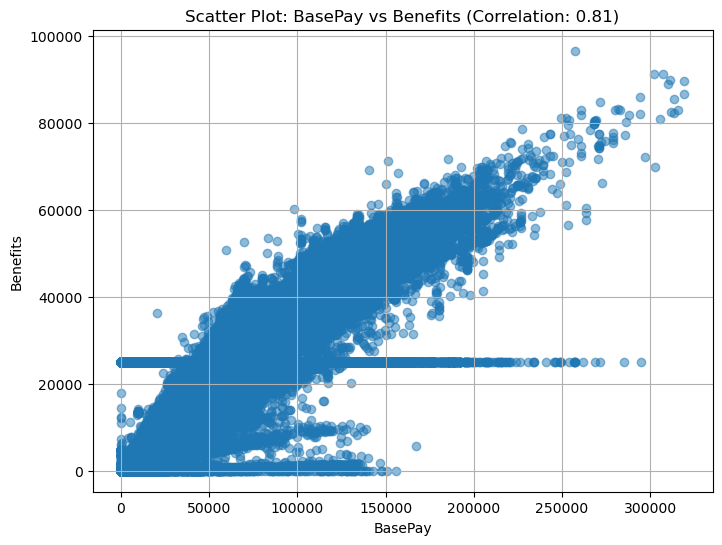

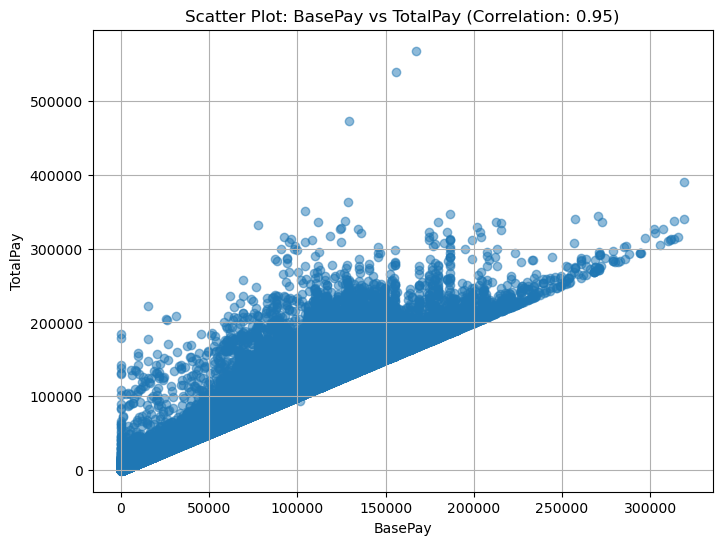

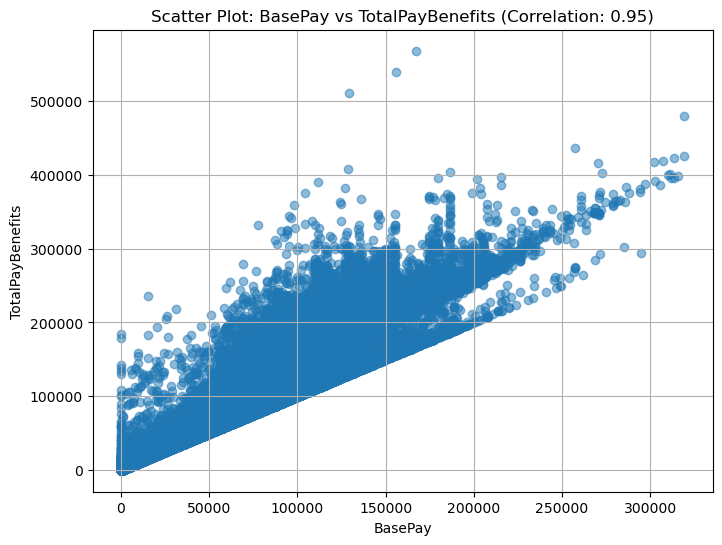

In [ ]:
#numeric_col (from part 2)
salary_column = 'BasePay'
for col in numeric_col:

    correlation = new_df[salary_column].corr(new_df[col])


    plt.figure(figsize=(8, 6))
    plt.scatter(new_df[salary_column], new_df[col], alpha=0.5)
    plt.title(f'Scatter Plot: {salary_column} vs {col} (Correlation: {correlation:.2f})')
    plt.xlabel(salary_column)
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

# Part 7
Summary of Insights: Write a brief report summarizing the findings and insights from the analyses

I have saved the text you provided. Here is a corrected and clearer version of it:

#In the first requirement,
I understood the data by identifying the data types and determining any missing values. I then applied statistical measurements as required .

#In requirement 3, I handled all the missing data as follows:
-There are many ways to handle missing values, such as dropping them, using statistical measures to fill them,etc.
After checking for missing values, I noticed that the "Notes" and "Status" columns contain only missing values. Therefore, I will be dropping both columns in the new dataframe.
-"Benefits" column has 36163 missing values. Though the number is small compared to the total records, I prefer to use mean imputation instead of dropping the records.
-"BasePay" column has 609 missing values, while "OvertimePay" and "OtherPay" columns have only 4. Because the number of missing values is small compared to the number of records, I will drop these rows.
dropna() drops rows with null values, so keep it for last.



#Requirement 4 involved visualizing the distribution of salaries .

#In requirement 5,
I grouped all the salaries once based on the job title,and once based on Year , then I applied all the statistical measurements, and compared the results through visualization.

#For requirement 6,
I identified the correlations between salary and all other numeric cols.